In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
df = pd.read_csv('realheart.csv')

In [34]:
X = df.drop(columns='target')
y = df['target']

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 42)

In [64]:
model = Sequential([
    Dense(128, activation='relu', input_dim = 13),
    BatchNormalization(momentum=0.2),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(momentum= 0.2),
    Dense(64, activation= 'relu'),
    Dropout(0.2),
    BatchNormalization(momentum= 0.2),
    Dense(32, activation= 'relu'),
    BatchNormalization(momentum=0.2),
    Dropout(0.2),
    Dense(1, activation= 'sigmoid')
])

model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# callback = EarlyStopping(
#     monitor ='val_accuracy',
#     patience = 15
# )

history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 64)

/home/taseermehboob/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.5209 - loss: 0.9227 - val_accuracy: 0.5921 - val_loss: 1.5049
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5895 - loss: 0.7808 - val_accuracy: 0.6447 - val_loss: 0.7495
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6524 - loss: 0.6857 - val_accuracy: 0.5658 - val_loss: 0.9603
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6601 - loss: 0.6787 - val_accuracy: 0.6184 - val_loss: 1.5038
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6206 - loss: 0.7422 - val_accuracy: 0.6579 - val_loss: 0.7405
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6805 - loss: 0.6282 - val_accuracy: 0.6184 - val_loss: 0.6772
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6556 - loss: 0.6815 - val_accuracy: 0.6316 - val_loss: 1.5772
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7123 - loss: 0.5536 - val_accuracy: 0.6447 - val_los

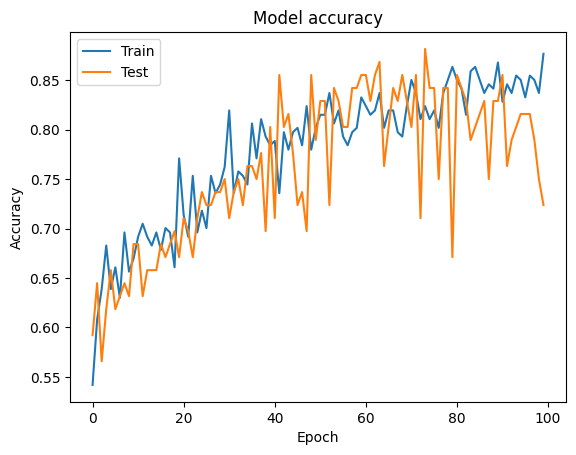

In [65]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()